In [72]:
%tensorflow_version 1.x

In [73]:
# https://github.com/ElectroNath/-Training-an-Object-Detection-Model-with-TensorFlow-API-using-Google-COLAB/blob/master/Training%20an%20Object%20Detection%20Model%20with%20TensorFlow%20API%20using%20Google%20COLAB%20notebook.ipynb

In [74]:
# pip install tensorflow-gpu==1.15.2

In [75]:
import tensorflow as tf

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
   raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
print(tf.__version__)

Found GPU at: /device:GPU:0
1.15.2


In [76]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [77]:
# import os
# os.remove(r'/content/gdrive/My Drive/tensorflow1/models/research/object_detection/images/train/running_338.xml')

In [78]:
%cd '/content/gdrive/My Drive/tensorflow1/'

/content/gdrive/My Drive/tensorflow1


In [79]:
# !git clone https://github.com/tensorflow/models.git

In [80]:
!apt-get install protobuf-compiler python-pil python-lxml python-tk
!pip install Cython

Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
python-lxml is already the newest version (4.2.1-1ubuntu0.1).
python-pil is already the newest version (5.1.0-1ubuntu0.3).
python-tk is already the newest version (2.7.17-1~18.04).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.


In [81]:
%cd /content/gdrive/My Drive/tensorflow1/models/research/
!protoc object_detection/protos/*.proto --python_out=.

/content/gdrive/My Drive/tensorflow1/models/research


In [82]:
import os
os.environ['PYTHONPATH'] += ':/content/gdrive/My Drive/tensorflow1/models/research/:/content/gdrive/My Drive/tensorflow1/models/research/slim' 

In [83]:
!python setup.py build
!python setup.py install

running build
running build_py
copying object_detection/protos/argmax_matcher_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/bipartite_matcher_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/anchor_generator_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/box_coder_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/center_net_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/flexible_grid_anchor_generator_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/faster_rcnn_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/calibration_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/eval_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/box_predictor_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/faster_rcnn_box_coder_pb2.py -> 

In [84]:
import time, psutil
Start = time.time()- psutil.boot_time()
Left= 12*3600 - Start
print('Time remaining for this session is: ', Left/3600)

Time remaining for this session is:  8.962258010109265


In [85]:
pip install tf_slim

In [86]:
#rember the last CD you did in order to specify the directory.
%cd /content/gdrive/My Drive/tensorflow1/models/research/object_detection/builders/
!python model_builder_test.py

/content/gdrive/My Drive/tensorflow1/models/research/object_detection/builders


In [87]:
%cd /content/gdrive/My Drive/tensorflow1/models/research/object_detection/

/content/gdrive/My Drive/tensorflow1/models/research/object_detection


In [90]:
import os, os.path

# Checking number of images
# path joining version for other paths
DIR = '/content/gdrive/My Drive/tensorflow1/models/research/object_detection/images/train'
print(len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))])) 

11750


In [91]:
import os, os.path

# Checking number of images
# path joining version for other paths
DIR = '/content/gdrive/My Drive/tensorflow1/models/research/object_detection/images/test'
print(len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))])) 

2048


In [92]:
myPath = '/content/gdrive/My Drive/tensorflow1/models/research/object_detection/images/train'

len([f for f in os.listdir(myPath) if f.endswith('.jpg') and os.path.isfile(os.path.join(myPath, f))])

5876

In [93]:
myPath = '/content/gdrive/My Drive/tensorflow1/models/research/object_detection/images/test'
len([f for f in os.listdir(myPath) if f.endswith('.jpg') and os.path.isfile(os.path.join(myPath, f))])

1024

In [94]:
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET

In [ ]:
# import os
# import glob
# import pandas as pd
# import xml.etree.ElementTree as ET
# def xml_to_csv(path):
#     xml_list = []
#     for xml_file in glob.glob(path + '/*.xml'):
#         tree = ET.parse(xml_file)
#         root = tree.getroot()
#         for member in root.findall('object'):
#             value = (root.find('filename').text,
#                      int(root.find('size')[0].text),
#                      int(root.find('size')[1].text),
#                      member[0].text,
#                      int(member[4][0].text),
#                      int(member[4][1].text),
#                      int(member[4][2].text),
#                      int(member[4][3].text)
#                      )
#             xml_list.append(value)
#     column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
#     xml_df = pd.DataFrame(xml_list, columns=column_name)
#     print(xml_df.shape)
#     return xml_df
# def main(directory_list):
#     for Image_cat in directory_list:
#         image_path = os.path.join(os.getcwd(), 'images/{}'.format(Image_cat))
#         print(image_path)
#         xml_df = xml_to_csv(image_path) 
#         xml_df.to_csv('data/{}_labels.csv'.format(Image_cat), index=None)
#         print('Successfully converted xml to csv.')
# main(['train','test'])

In [ ]:
# import os  
    
# # path  

# # path = '/content/gdrive/My Drive/tensorflow1/models/research/object_detection/images/test/shooting_an_arrow87.jpeg'
# path = '/content/gdrive/My Drive/tensorflow1/models/research/object_detection/images/test/shooting_an_arrow87.xml'
    
# # Remove the specified   
# # file path  
# try:  
#     os.remove(path)  
#     print("% s removed successfully" % path)  
# except OSError as error:  
#     print(error)  
#     print("File path can not be removed")  

In [ ]:
%cd /content/gdrive/My Drive/tensorflow1/models/research/object_detection/

/content/gdrive/My Drive/tensorflow1/models/research/object_detection


In [ ]:
!python generate_tfrecord.py --csv_input=images/train_labels.csv --image_dir=images/train --output_path=train.record



W0915 05:45:20.759744 140591167281024 module_wrapper.py:139] From generate_tfrecord.py:114: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.


W0915 05:45:23.125369 140591167281024 module_wrapper.py:139] From generate_tfrecord.py:73: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

Successfully created the TFRecords: /content/gdrive/My Drive/tensorflow1/models/research/object_detection/train.record


In [ ]:
!python generate_tfrecord1.py --csv_input=images/test_labels.csv --image_dir=images/test --output_path=test.record




W0915 06:17:19.268742 140603427411840 module_wrapper.py:139] From generate_tfrecord1.py:114: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.


W0915 06:17:20.169015 140603427411840 module_wrapper.py:139] From generate_tfrecord1.py:73: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

Successfully created the TFRecords: /content/gdrive/My Drive/tensorflow1/models/research/object_detection/test.record


In [95]:

import time, psutil
Start = time.time()- psutil.boot_time()
Left= 12*3600 - Start
print('Time remaining for this session is: ', Left/3600)

Time remaining for this session is:  8.943266224861144


In [96]:
pip install tensorboardcolab


In [97]:
%load_ext tensorboard


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [1]:
!python train.py --logtostderr --train_dir=training1/ --pipeline_config_path=training/faster_rcnn_inception_v2_pets.config

python3: can't open file 'train.py': [Errno 2] No such file or directory


In [ ]:
%cd /content/gdrive/My Drive/tensorflow1/models/research/object_detection/

/content/gdrive/My Drive/tensorflow1/models/research/object_detection


In [ ]:
%tensorboard --logdir training/

In [ ]:
tensorboard --logdir=training


In [ ]:
# !kill 3580

In [ ]:
!python export_inference_graph.py --input_type image_tensor --pipeline_config_path training/faster_rcnn_inception_v2_pets.config --trained_checkpoint_prefix training/model.ckpt-156885 --output_directory inference_graph

Instructions for updating:
Please use `layer.__call__` method instead.
W0908 04:48:47.250210 139995552688000 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tf_slim/layers/layers.py:2802: Layer.apply (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.__call__` method instead.
INFO:tensorflow:Scale of 0 disables regularizer.
I0908 04:48:48.619163 139995552688000 regularizers.py:99] Scale of 0 disables regularizer.
INFO:tensorflow:Scale of 0 disables regularizer.
I0908 04:48:48.632053 139995552688000 regularizers.py:99] Scale of 0 disables regularizer.
INFO:tensorflow:depth of additional conv before box predictor: 0
I0908 04:48:48.632405 139995552688000 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0908 04:48:48.681604 139995552688000 deprecati

In [ ]:
%cd /content/gdrive/My Drive/tensorflow1/models/research/object_detection/

/content/gdrive/My Drive/tensorflow1/models/research/object_detection


In [ ]:
# Testing

In [ ]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util



### Model preparation variable
MODEL_NAME = 'inference_graph'
PATH_TO_FROZEN_GRAPH = MODEL_NAME + '/frozen_inference_graph.pb'
PATH_TO_LABELS = 'training/labelmap.pbtxt'
NUM_CLASSES = 4 #remember number of objects you are training? cool.


### Load a (frozen) Tensorflow model into memory.
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')


###Loading label map
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)




### Load image into numpy function
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)




###STATING THE PATH TO IMAGES TO BE TESTED
PATH_TO_TEST_IMAGES_DIR = 'test_images/'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'image{}.jpg'.format(i)) for i in range(1, 78) ]
IMAGE_SIZE = (12, 8)




### Function to run inference on a single image which will later be used in an iteration
def run_inference_for_single_image(image, graph):
  with graph.as_default():
    with tf.Session() as sess:
      # Get handles to input and output tensors
      ops = tf.get_default_graph().get_operations()
      all_tensor_names = {output.name for op in ops for output in op.outputs}
      tensor_dict = {}
      for key in [
          'num_detections', 'detection_boxes', 'detection_scores',
          'detection_classes', 'detection_masks'
      ]:
        tensor_name = key + ':0'
        if tensor_name in all_tensor_names:
          tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
              tensor_name)
      if 'detection_masks' in tensor_dict:
        # The following processing is only for single image
        detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
        detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
        # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
        real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
        detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
        detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
            detection_masks, detection_boxes, image.shape[1], image.shape[2])
        detection_masks_reframed = tf.cast(
            tf.greater(detection_masks_reframed, 0.5), tf.uint8)
        # Follow the convention by adding back the batch dimension
        tensor_dict['detection_masks'] = tf.expand_dims(
            detection_masks_reframed, 0)
      image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

      # Run inference
      output_dict = sess.run(tensor_dict,
                             feed_dict={image_tensor: image})

      # all outputs are float32 numpy arrays, so convert types as appropriate
      output_dict['num_detections'] = int(output_dict['num_detections'][0])
      output_dict['detection_classes'] = output_dict[
          'detection_classes'][0].astype(np.int64)
      output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
      output_dict['detection_scores'] = output_dict['detection_scores'][0]
      if 'detection_masks' in output_dict:
        output_dict['detection_masks'] = output_dict['detection_masks'][0]
  return output_dict


In [ ]:
### To iterate on each image in the test image path defined 
### NB define the range of numbers and let it match the number of imAGES IN TEST FOLDER +1
image_no = 1
for image_path in TEST_IMAGE_PATHS:
  image = Image.open(image_path)
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
  image_np = load_image_into_numpy_array(image)
  # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
  image_np_expanded = np.expand_dims(image_np, axis=0)
  # Actual detection.
  output_dict = run_inference_for_single_image(image_np_expanded, detection_graph)
  # Visualization of the results of a detection.
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks'),
      use_normalized_coordinates=True,
      line_thickness=1,
      min_score_thresh=0.80)
  display(Image.fromarray(image_np))
  image1 = Image.fromarray(image_np)
  path_image= "/content/gdrive/My Drive/tensorflow1/models/research/object_detection/Results/" + str(image_no) + '.jpg'
  image1.save(path_image, 'JPEG')
  image_no += 1
  
  # cv2.imwrite(path_img_an, image_np)



Output hidden; open in https://colab.research.google.com to view.

In [ ]:
%cd /content/gdrive/My Drive/tensorflow1/models/research/object_detection/

/content/gdrive/My Drive/tensorflow1/models/research/object_detection


In [ ]:
 # Import packages
import os
import cv2
import numpy as np
import tensorflow as tf
import sys
from google.colab.patches import cv2_imshow

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")

# Import utilites
from utils import label_map_util
from utils import visualization_utils as vis_util

# Name of the directory containing the object detection module we're using
MODEL_NAME = 'inference_graph'
IMAGE_NAME = 'test_images/image55.jpg'

# Grab path to current working directory
CWD_PATH = os.getcwd()

# Path to frozen detection graph .pb file, which contains the model that is used
# for object detection.
PATH_TO_CKPT = os.path.join(CWD_PATH,MODEL_NAME,'frozen_inference_graph.pb')

# Path to label map file
PATH_TO_LABELS = os.path.join(CWD_PATH,'training','labelmap.pbtxt')

# Path to image
PATH_TO_IMAGE = os.path.join(CWD_PATH,IMAGE_NAME)

# Number of classes the object detector can identify
NUM_CLASSES = 15

# Load the label map.
# Label maps map indices to category names, so that when our convolution
# network predicts `5`, we know that this corresponds to `king`.
# Here we use internal utility functions, but anything that returns a
# dictionary mapping integers to appropriate string labels would be fine
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

# Load the Tensorflow model into memory.
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

    sess = tf.Session(graph=detection_graph)

# Define input and output tensors (i.e. data) for the object detection classifier

# Input tensor is the image
image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')

# Output tensors are the detection boxes, scores, and classes
# Each box represents a part of the image where a particular object was detected
detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')

# Each score represents level of confidence for each of the objects.
# The score is shown on the result image, together with the class label.
detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')

# Number of objects detected
num_detections = detection_graph.get_tensor_by_name('num_detections:0')

# Load image using OpenCV and
# expand image dimensions to have shape: [1, None, None, 3]
# i.e. a single-column array, where each item in the column has the pixel RGB value

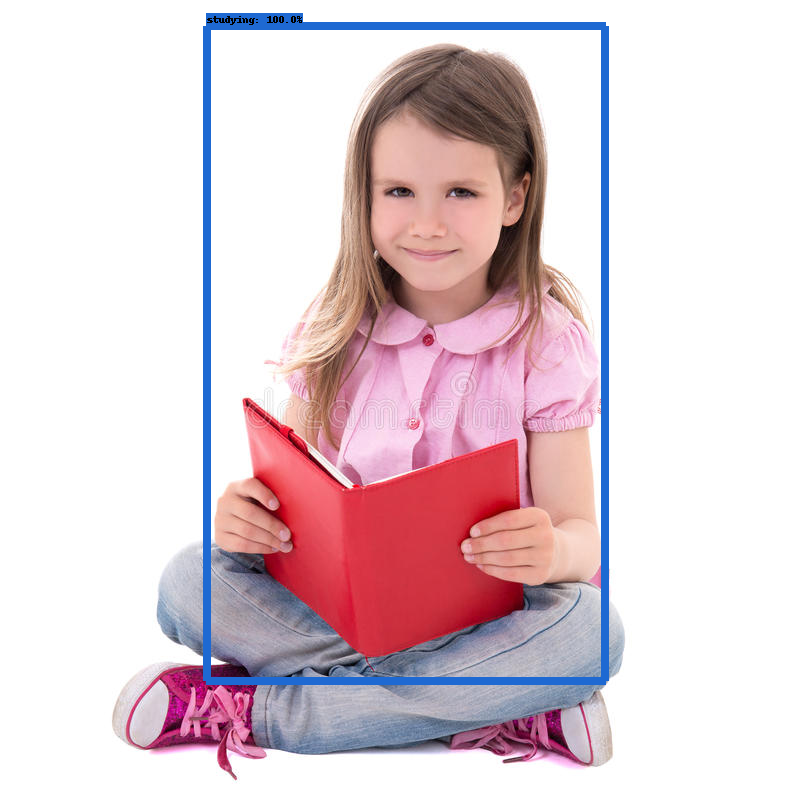

In [ ]:
# for image_path in TEST_IMAGE_PATHS:
#   image = Image.open(image_path)
image = cv2.imread(PATH_TO_IMAGE)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image_rgb, axis=0)

# Perform the actual detection by running the model with the image as input
(boxes, scores, classes, num) = sess.run(
    [detection_boxes, detection_scores, detection_classes, num_detections],
    feed_dict={image_tensor: image_expanded})

# Draw the results of the detection (aka 'visulaize the results')

vis_util.visualize_boxes_and_labels_on_image_array(
    image,
    np.squeeze(boxes),
    np.squeeze(classes).astype(np.int32),
    np.squeeze(scores),
    category_index,
    use_normalized_coordinates=True,
    line_thickness=8,
    min_score_thresh=0.99)

# All the results have been drawn on image. Now display the image.
cv2_imshow( image)

# Press any key to close the image
cv2.waitKey(0)

# Clean up
cv2.destroyAllWindows()